In [1]:
import torch
from torch import Tensor
from train import train_gfn_sr

### Benchmark Nguyen sin ruido

In [2]:
def h1(x: Tensor) -> Tensor:
    return x[:, 0].pow(3) + x[:, 0].pow(2) + x[:, 0]

def h2(x: Tensor) -> Tensor:
    return x[:, 0].pow(4) + x[:, 0].pow(3) + x[:, 0].pow(2) + x[:, 0]

def h3(x: Tensor) -> Tensor:
    return (
        x[:, 0].pow(5) + x[:, 0].pow(4) +
        x[:, 0].pow(3) + x[:, 0].pow(2) + x[:, 0]
    )

def h4(x: Tensor) -> Tensor:
    return (
        x[:, 0].pow(6) + x[:, 0].pow(5) +
        x[:, 0].pow(4) + x[:, 0].pow(3) +
        x[:, 0].pow(2) + x[:, 0]
    )

def h5(x: Tensor) -> Tensor:
    return x[:, 0].pow(2).sin() * x[:, 0].cos() - 1

def h6(x: Tensor) -> Tensor:
    return x[:, 0].sin() + (x[:, 0] + x[:, 0].pow(2)).sin()

def h7(x: Tensor) -> Tensor:
    return (x[:, 0] + 1).log() + (x[:, 0].pow(2) + 1).log()

def h8(x: Tensor) -> Tensor:
    return x[:, 0].sqrt()

def h9(x: Tensor, y: Tensor) -> Tensor:
     return x[:, 0].sin() + y[:, 0].pow(2).sin()

def h10(x: Tensor, y: Tensor) -> Tensor:
    return 2 * x[:, 0].sin() * y[:, 0].cos()

def h11(x: Tensor, y: Tensor) -> Tensor:
    return x[:, 0].pow(y[:, 0])

def h12(x: Tensor, y: Tensor) -> Tensor:
    return (
        x[:, 0].pow(4) - x[:, 0].pow(3) +
        0.5 * y[:, 0].pow(2) - y[:, 0]
    )


#### Intervalos considerados

In [ ]:
FUNC_PARAMS = {
    h1: {"interval": (-1, 1), "n_variables": 1, "expr": "x**3 + x**2 + x"},
    h2: {"interval": (-1, 1), "n_variables": 1, "expr": "x**4 + x**3 + x**2 + x"},
    h3: {"interval": (-1, 1), "n_variables": 1, "expr": "x**5 + x**4 + x**3 + x**2 + x"},
    h4: {"interval": (-1, 1), "n_variables": 1, "expr": "x**6 + x**5 + x**4 + x**3 + x**2 + x"},
    h5: {"interval": (-1, 1), "n_variables": 1, "expr": "sin(x**2)cos(x) - 1"},
    h6: {"interval": (-1, 1), "n_variables": 1, "expr": "sin(x) + sin(x + x**2)"},
    h7: {"interval": (0, 2), "n_variables": 1, "expr": "log(x + 1) + log(x**2 + 1)"},
    h8: {"interval": (0, 4), "n_variables": 1, "expr": "sqrt(x)"},
    h9: {"interval": (-1, 1), "n_variables": 2, "expr": "sin(x) + sin(y**2)"},
    h10: {"interval": (-1, 1), "n_variables": 2, "expr": "2sin(x)cos(y)"},
    # h11: {"interval": (1, 3), "n_variables": 2, "expr": "x**y"},
    # h12: {"interval": (0, 2), "n_variables": 2, "expr": "x**4 - x**3 + 0.5 * y**2 - y"},
}

In [4]:
batch_size = 64
num_epochs = 5000

--------------------------------------------------
FUNCTION x**3 + x**2 + x
training started with device cuda


15.359:   0%|          | 0/5000 [00:00<?, ?it/s]


new best reward (vanilla): 0.9330788254737854
mse (pre/post optimized): 0.07110562175512314/0.07110562175512314
(exp(x1)) * (sin(x1))
expr: exp(x1)*sin(x1)


0.000: 100%|██████████| 5000/5000 [01:40<00:00, 49.69it/s]


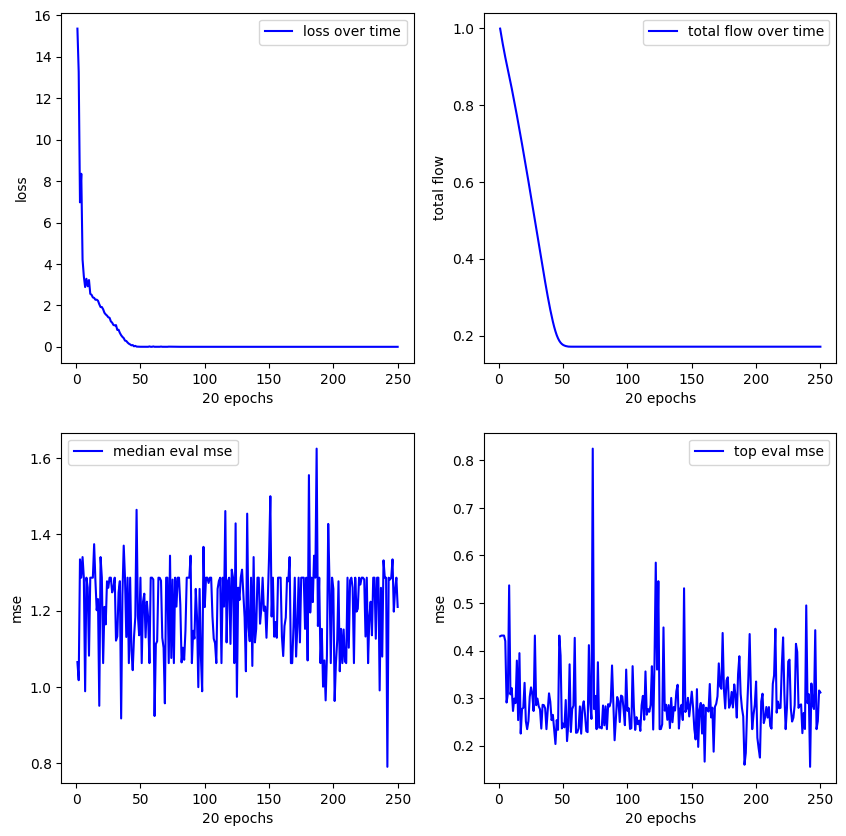

--------------------------------------------------
FUNCTION x**4 + x**3 + x**2 + x
training started with device cuda


15.175:   0%|          | 2/5000 [00:00<04:37, 18.03it/s]


new best reward (vanilla): 0.8622012138366699
mse (pre/post optimized): 0.1407475620508194/0.1407475620508194
(exp(x1)) * (sin(x1))
expr: exp(x1)*sin(x1)


0.000: 100%|██████████| 5000/5000 [01:21<00:00, 61.41it/s]


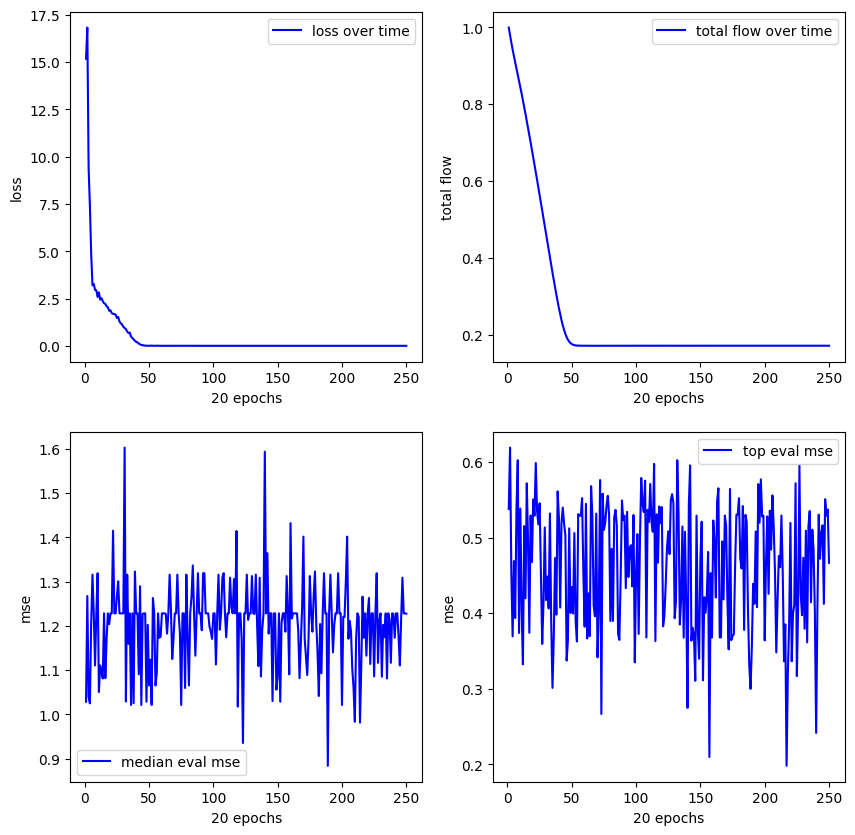

--------------------------------------------------
FUNCTION x**5 + x**4 + x**3 + x**2 + x
training started with device cuda


15.183:   0%|          | 4/5000 [00:00<02:11, 37.92it/s]


new best reward (vanilla): 0.8663219213485718
mse (pre/post optimized): 0.2069275677204132/0.2069275677204132
((x1) + (x1)) * (exp(x1))
expr: 2*x1*exp(x1)


0.000: 100%|██████████| 5000/5000 [01:18<00:00, 63.55it/s]


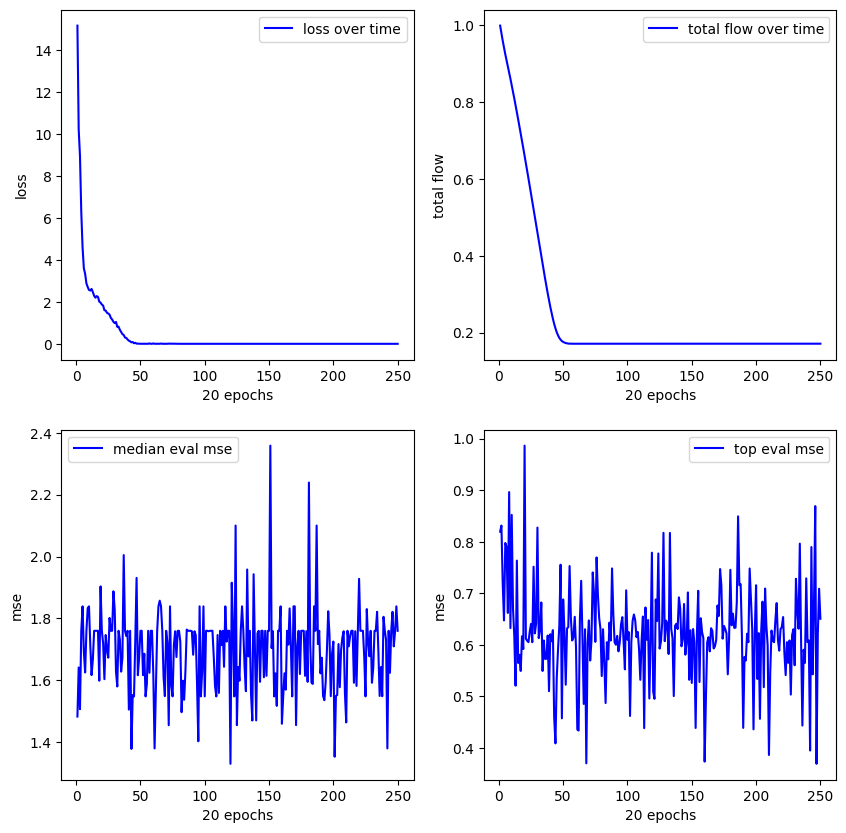

--------------------------------------------------
FUNCTION x**6 + x**5 + x**4 + x**3 + x**2 + x
training started with device cuda


14.352:   0%|          | 4/5000 [00:00<02:17, 36.43it/s]


new best reward (vanilla): 0.8935155868530273
mse (pre/post optimized): 0.18410128355026245/0.18410128355026245
((x1) + (x1)) * (exp(x1))
expr: 2*x1*exp(x1)


0.000: 100%|██████████| 5000/5000 [01:22<00:00, 60.53it/s]


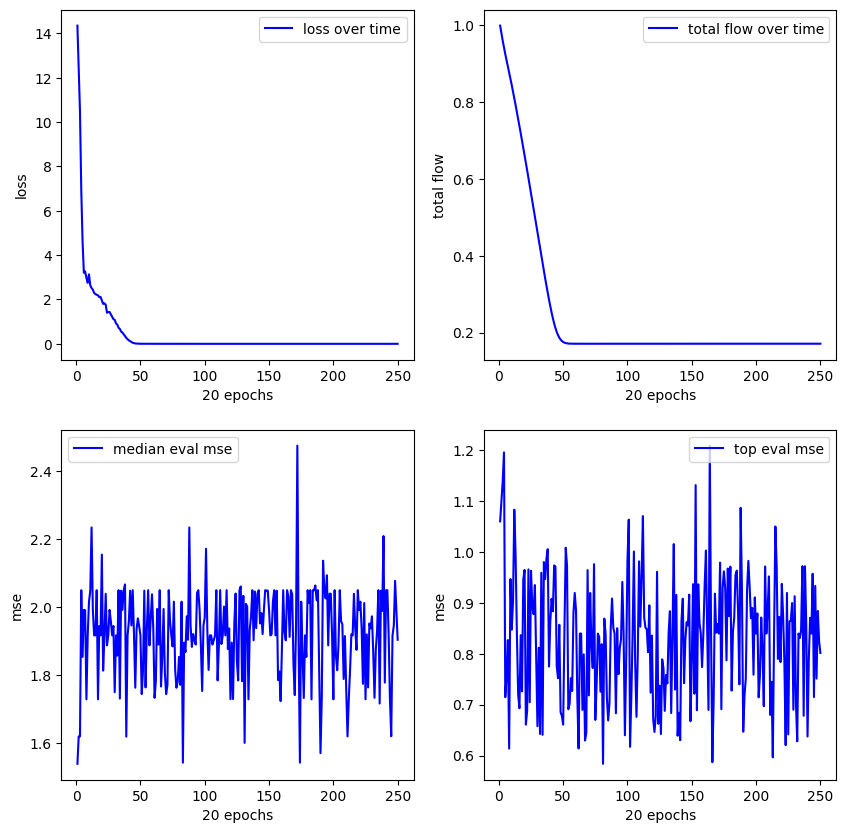

--------------------------------------------------
FUNCTION sin(x**2)cos(x) - 1
training started with device cuda


13.204:   0%|          | 1/5000 [00:00<15:25,  5.40it/s]


new best reward (vanilla): 9.999999747378752e-05
mse (pre/post optimized): 7010143.5/2100589.25
square((0.29) / (x1))
expr: square(0.29/x1)


13.204:   0%|          | 17/5000 [00:00<02:35, 31.97it/s]


new best reward (vanilla): 0.7316427230834961
mse (pre/post optimized): 0.006565005052834749/0.006565005052834749
((-0.01) * (x1)) - (cos(x1))
expr: -0.01*x1 - cos(x1)


0.000: 100%|██████████| 5000/5000 [01:22<00:00, 60.91it/s]


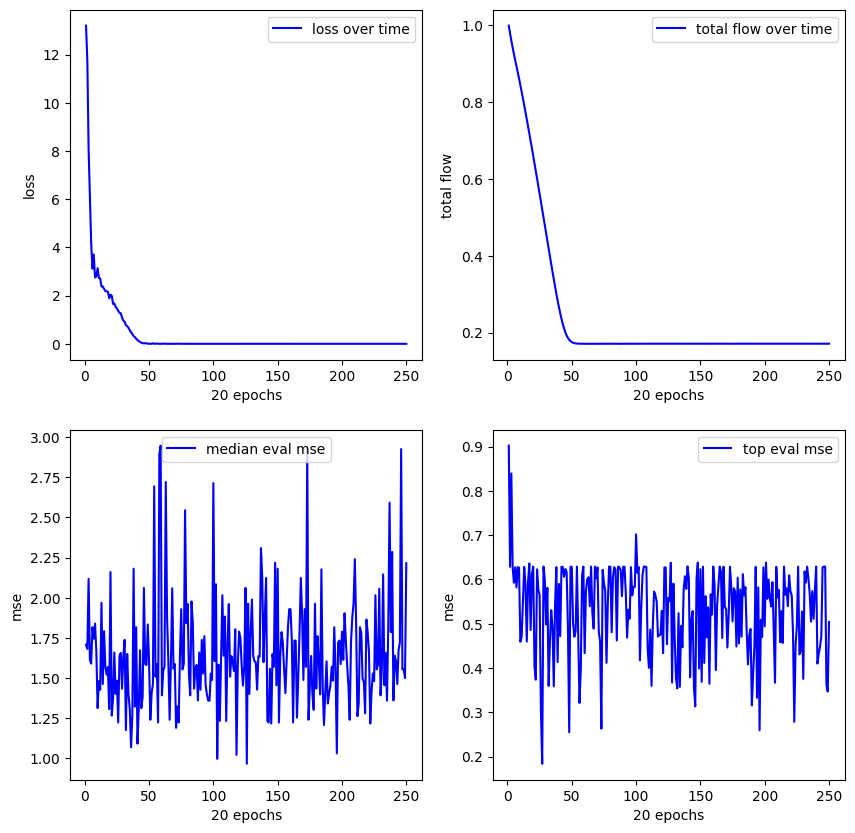

--------------------------------------------------
FUNCTION sin(x) + sin(x + x**2)
training started with device cuda


16.395:   0%|          | 4/5000 [00:00<02:06, 39.41it/s]


new best reward (vanilla): 0.8623624444007874
mse (pre/post optimized): 0.12516316771507263/0.12516316771507263
(exp(x1)) * (sin(x1))
expr: exp(x1)*sin(x1)


0.000: 100%|██████████| 5000/5000 [01:18<00:00, 63.33it/s]


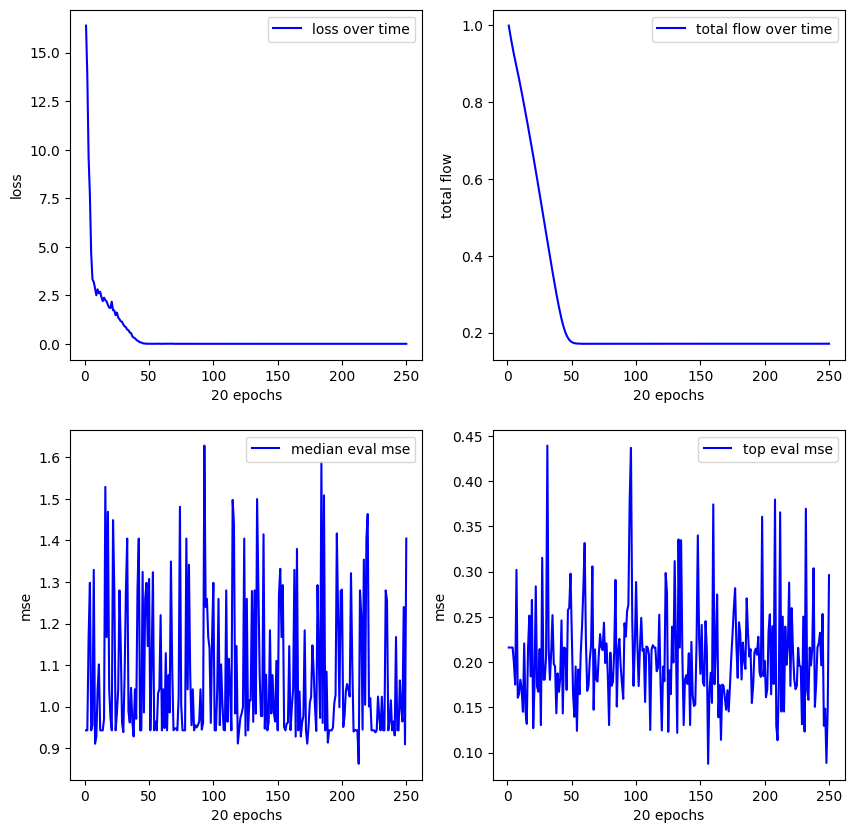

--------------------------------------------------
FUNCTION log(x + 1) + log(x**2 + 1)
training started with device cuda


12.523:   0%|          | 2/5000 [00:00<04:50, 17.18it/s]


new best reward (vanilla): 0.7149989604949951
mse (pre/post optimized): 0.18460102379322052/0.18460102379322052
x1
expr: x1

new best reward (vanilla): 0.7608962059020996
mse (pre/post optimized): 0.055212173610925674/0.028243422508239746
(sin(x1)) + ((0.72) * (x1))
expr: 0.72*x1 + sin(x1)

new best reward (vanilla): 0.8376793265342712
mse (pre/post optimized): 0.011814066208899021/0.023165369406342506
((x1) - (0.45)) + (sin(x1))
expr: x1 + sin(x1) - 0.45


12.523:   0%|          | 18/5000 [00:00<03:04, 27.05it/s]


new best reward (vanilla): 0.8958327174186707
mse (pre/post optimized): 0.001054168795235455/0.0010783768957480788
((x1) - (0.01)) + ((x1) * (0.38))
expr: 1.38*x1 - 0.01


0.000: 100%|██████████| 5000/5000 [01:21<00:00, 61.12it/s]


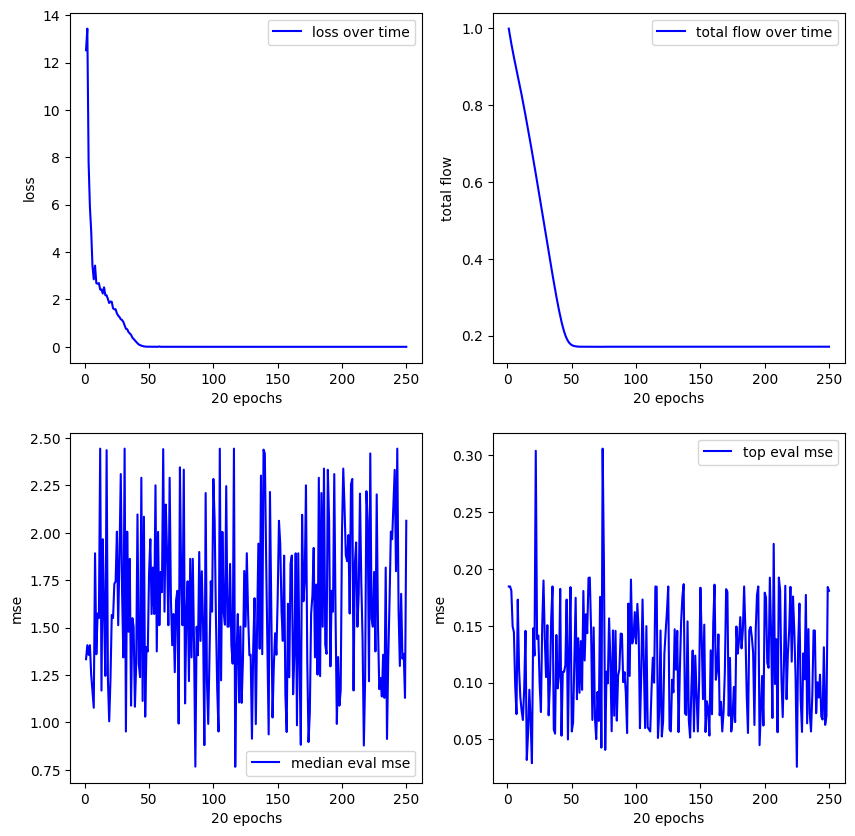

--------------------------------------------------
FUNCTION sqrt(x)
training started with device cuda


13.404:   0%|          | 3/5000 [00:00<03:31, 23.58it/s]


new best reward (vanilla): 0.9725216031074524
mse (pre/post optimized): 0.005633232649415731/2.770855189737631e-06
sqrt((1.0) * (x1))
expr: 1.0*sqrt(x1)

new best reward (vanilla): 1.0
mse (pre/post optimized): 0.0/0.0
sqrt(x1)
expr: sqrt(x1)


0.089: 100%|██████████| 5000/5000 [01:33<00:00, 53.28it/s]


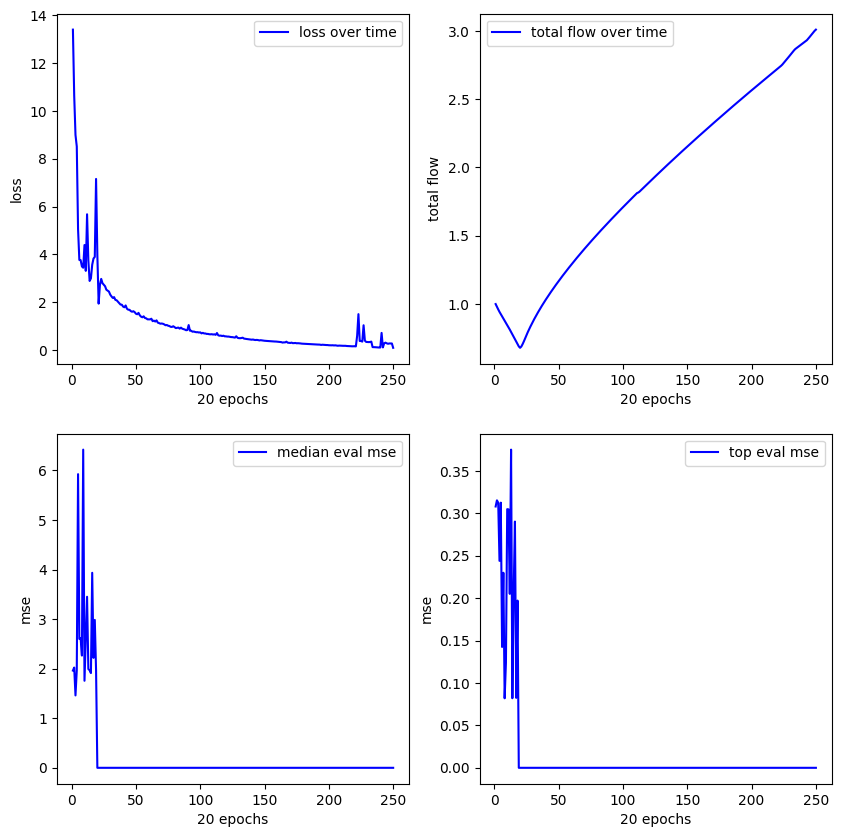

--------------------------------------------------
FUNCTION sin(x) + sin(y**2)
training started with device cuda


15.462:   0%|          | 1/5000 [00:00<09:05,  9.17it/s]


new best reward (vanilla): 0.6402990221977234
mse (pre/post optimized): 0.11688055098056793/0.07468198984861374
((0.33) + (x1)) * ((x1) / (x1))
expr: x1 + 0.33

new best reward (vanilla): 0.9845118522644043
mse (pre/post optimized): 0.0021325096022337675/0.0021325096022337675
(square(x2)) + (sin(x1))
expr: square(x2) + sin(x1)


0.001: 100%|██████████| 5000/5000 [02:24<00:00, 34.60it/s]


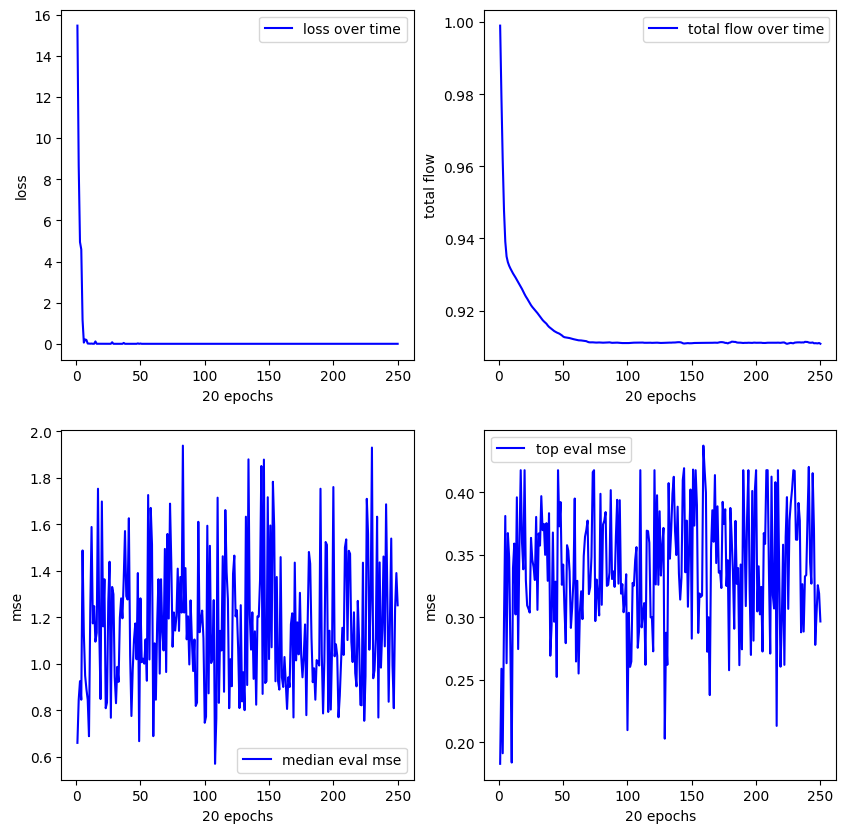

--------------------------------------------------
FUNCTION 2sin(x)cos(y)
training started with device cuda


17.616:   0%|          | 2/5000 [00:00<04:18, 19.33it/s]


new best reward (vanilla): 0.8448383212089539
mse (pre/post optimized): 0.14021414518356323/0.14021414518356323
x1
expr: x1


0.000: 100%|██████████| 5000/5000 [02:24<00:00, 34.57it/s]


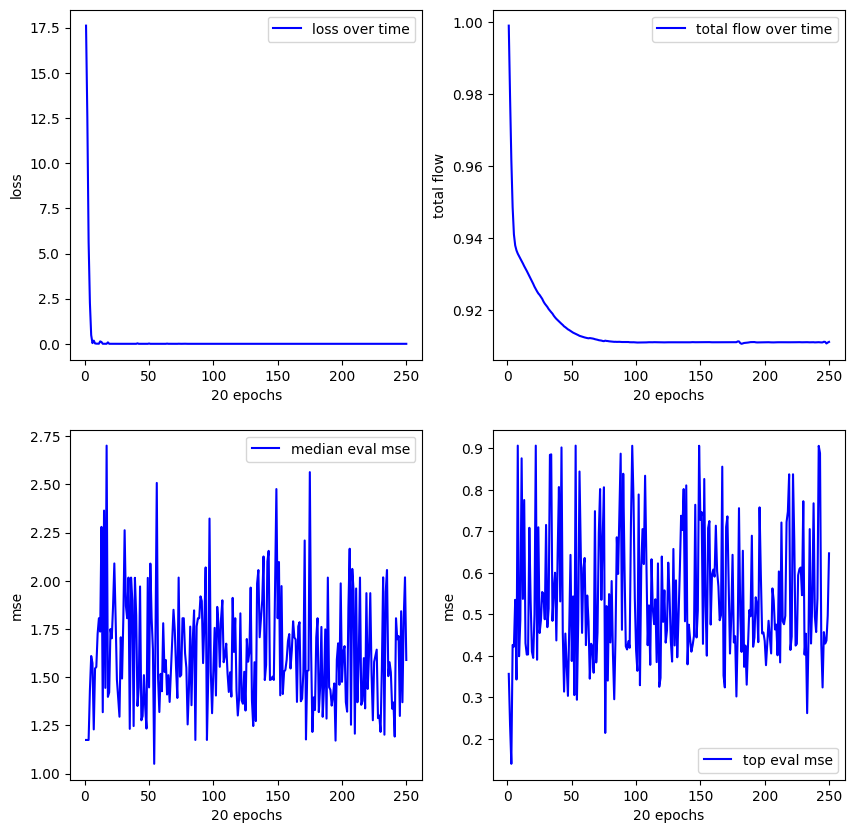

--------------------------------------------------
FUNCTION x**y
training started with device cuda


24.707:   0%|          | 2/5000 [00:00<05:48, 14.33it/s]


new best reward (vanilla): 0.6814632415771484
mse (pre/post optimized): 5.919126987457275/5.920012950897217
((x2) * (0.38)) * ((x1) / (0.27))
expr: 1.40740740740741*x1*x2


0.000: 100%|██████████| 5000/5000 [04:21<00:00, 19.10it/s]


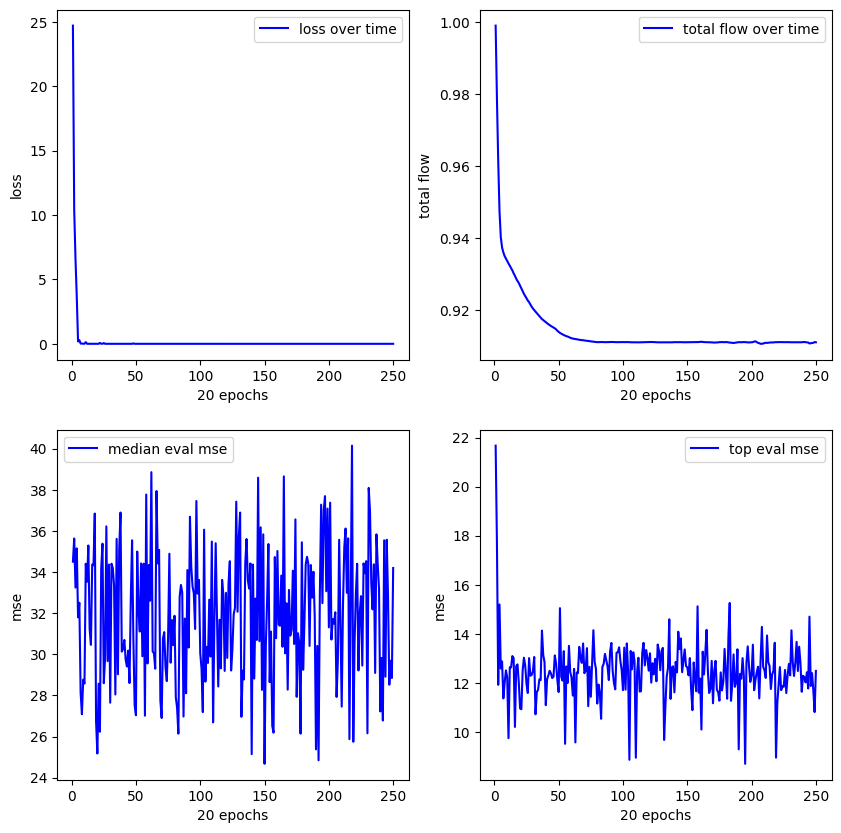

--------------------------------------------------
FUNCTION x**4 - x**3 + 0.5 * y**2 - y
training started with device cuda


21.591:   0%|          | 3/5000 [00:00<03:21, 24.82it/s]


new best reward (vanilla): 0.6499838829040527
mse (pre/post optimized): 1.2917065620422363/1.2917065620422363
(square(x1)) * ((x2) / (x2))
expr: square(x1)


0.000: 100%|██████████| 5000/5000 [04:00<00:00, 20.82it/s]


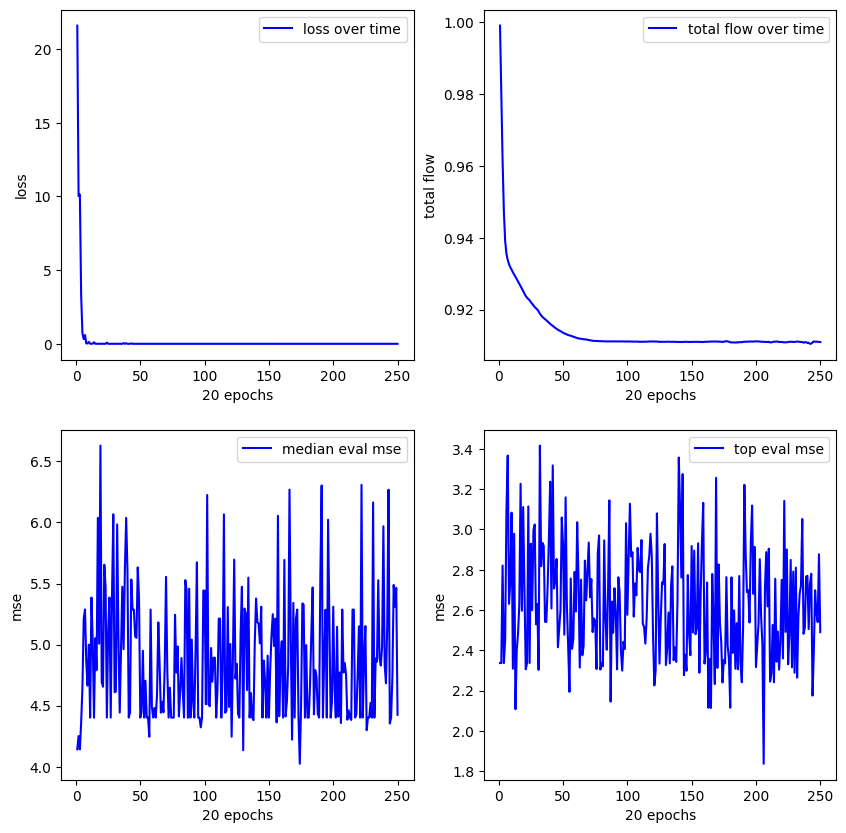

In [5]:
for i, (function, params) in enumerate(FUNC_PARAMS.items()):
    print('-'*50)
    print(f"FUNCTION {params['expr']}")
    low_bound, upp_bound = params["interval"]
    # Traslación lineal al intervalo correspondiente
    X = torch.empty(200, params["n_variables"]).uniform_(0, 1) * (upp_bound - low_bound) + low_bound
    y = function(*X.split(1, dim=1))
    model, env, errs, avg_mses, top_mses = train_gfn_sr(X, y, batch_size, num_epochs, show_plot=True, use_gpu=True)
    torch.save(model, f"h_{i+1}_no_noise.pt")